In [1]:
!wget https://mercury.picoctf.net/static/21c07c9dd20cd9f2459a0ae75d99af6e/tunn3l_v1s10n

--2023-05-22 22:24:16--  https://mercury.picoctf.net/static/21c07c9dd20cd9f2459a0ae75d99af6e/tunn3l_v1s10n
Resolving mercury.picoctf.net (mercury.picoctf.net)... 18.189.209.142
Connecting to mercury.picoctf.net (mercury.picoctf.net)|18.189.209.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2893454 (2.8M) [application/octet-stream]
Saving to: ‘tunn3l_v1s10n’

tunn3l_v1s10n       100%[===================>]   2.76M   605KB/s    in 4.7s    

2023-05-22 22:24:22 (605 KB/s) - ‘tunn3l_v1s10n’ saved [2893454/2893454]



In [3]:
!head tunn3l_v1s10n

BM�&,     ��  ��  n  2        X&, %  %          #') *!&1(%5,)3*'8/,/&#3*&-$ ;2.2)%0'#3*&8,(6+'9-+/&##)U=1�vf�fR�mV�pX�oT�oT�~c��m��iȗq��q��t��s��r��o��n��k��j��d�tU�wZ�oVvR:qR=lO@mRDnSIw^TS93pXRvaYs_T~k^�tc~jYvbPv^LzbP�m]�iY�sc��q��t�~n��q�scsZJpWGZA1O6&N7'O8(O8(Q:*P9)O8)K5)P:/K5*?)B.#K7,E1&?+ C/$C/$@*H2'K2(G.$@'E,"L4(L4(K3'J2&L2$N4&P5'R7)S6(U8*K0"]B4cI9I/D+M4$M6'J3$F, H."F."D."<&2 02#6'<+">+$B,&^D>fLF63?0-
	 


   	
	" 	  
	

	
  


The first two characters are 'BM'. It is a `bmp` file.

In [6]:
# copy the file
!cp tunn3l_v1s10n temp

In [2]:
!hexdump -C tunn3l_v1s10n > temp.txt

[Wikipedia article (BMP file format)](https://en.wikipedia.org/wiki/BMP_file_format)


<table class="wikitable">

<tbody><tr>
<th>Offset hex
</th>
<th>Offset dec
</th>
<th>Size
</th>
<th>Purpose
</th></tr>
<tr>
<td>00</td>
<td>0
</td>
<td>2&nbsp;bytes
</td>
<td>The <a href="/wiki/File_format#Magic_number" title="File format">header field</a> used to identify the BMP and DIB file is <code>0x42 0x4D</code> in <a href="/wiki/Hexadecimal" title="Hexadecimal">hexadecimal</a>, same as <code>BM</code> in ASCII. The following entries are possible:
<dl><dt>BM</dt>
<dd>Windows 3.1x, 95, NT, ... etc.</dd>
<dt>BA</dt>
<dd>OS/2 struct bitmap array</dd>
<dt>CI</dt>
<dd>OS/2 struct color icon</dd>
<dt>CP</dt>
<dd>OS/2 const color pointer</dd>
<dt>IC</dt>
<dd>OS/2 struct icon</dd>
<dt>PT</dt>
<dd>OS/2 pointer</dd></dl>
</td></tr>
<tr>
<td>02</td>
<td>2
</td>
<td>4&nbsp;bytes
</td>
<td>The size of the BMP file in bytes
</td></tr>
<tr>
<td>06</td>
<td>6
</td>
<td>2&nbsp;bytes
</td>
<td>Reserved; actual value depends on the application that creates the image, if created manually can be 0
</td></tr>
<tr>
<td>08</td>
<td>8
</td>
<td>2&nbsp;bytes
</td>
<td>Reserved; actual value depends on the application that creates the image, if created manually can be 0
</td></tr>
<tr>
<td>0A</td>
<td>10
</td>
<td>4&nbsp;bytes
</td>
<td>The offset, i.e. starting address, of the byte where the bitmap image data (pixel array) can be found.
</td></tr></tbody></table>

<table class="wikitable">
<tbody><tr>
<th>Offset (hex)</th>
<th>Offset (dec)
</th>
<th>Size (bytes)
</th>
<th>Windows <link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r886049734"><span class="monospaced">BITMAPINFOHEADER</span><sup id="cite_ref-bmp_2-2" class="reference"><a href="#cite_note-bmp-2">[2]</a></sup>
</th></tr>
<tr>
<td>0E</td>
<td>14
</td>
<td>4
</td>
<td>the size of this header, in bytes (40)
</td></tr>
<tr>
<td>12</td>
<td>18
</td>
<td>4
</td>
<td>the bitmap width in pixels (signed integer)
</td></tr>
<tr>
<td>16</td>
<td>22
</td>
<td>4
</td>
<td>the bitmap height in pixels (signed integer)
</td></tr>
<tr>
<td>1A</td>
<td>26
</td>
<td>2
</td>
<td>the number of color planes (must be 1)
</td></tr>
<tr>
<td>1C</td>
<td>28
</td>
<td>2
</td>
<td>the number of bits per pixel, which is the color depth of the image. Typical values are 1, 4, 8, 16, 24 and 32.
</td></tr>
<tr>
<td>1E</td>
<td>30
</td>
<td>4
</td>
<td>the compression method being used. See the next table for a list of possible values
</td></tr>
<tr>
<td>22</td>
<td>34
</td>
<td>4
</td>
<td>the image size. This is the size of the raw bitmap data; a dummy 0 can be given for BI_RGB bitmaps.
</td></tr>
<tr>
<td>26</td>
<td>38
</td>
<td>4
</td>
<td>the horizontal resolution of the image. (pixel per metre, signed integer)
</td></tr>
<tr>
<td>2A</td>
<td>42
</td>
<td>4
</td>
<td>the vertical resolution of the image. (pixel per metre, signed integer)
</td></tr>
<tr>
<td>2E</td>
<td>46
</td>
<td>4
</td>
<td>the number of colors in the color palette, or 0 to default to 2<sup><i>n</i></sup>
</td></tr>
<tr>
<td>32</td>
<td>50
</td>
<td>4
</td>
<td>the number of important colors used, or 0 when every color is important; generally ignored
</td></tr></tbody></table>

In [4]:
!head temp.txt

00000000  42 4d 8e 26 2c 00 00 00  00 00 ba d0 00 00 ba d0  |BM.&,...........|
00000010  00 00 6e 04 00 00 32 01  00 00 01 00 18 00 00 00  |..n...2.........|
00000020  00 00 58 26 2c 00 25 16  00 00 25 16 00 00 00 00  |..X&,.%...%.....|
00000030  00 00 00 00 00 00 23 1a  17 27 1e 1b 29 20 1d 2a  |......#..'..) .*|
00000040  21 1e 26 1d 1a 31 28 25  35 2c 29 33 2a 27 38 2f  |!.&..1(%5,)3*'8/|
00000050  2c 2f 26 23 33 2a 26 2d  24 20 3b 32 2e 32 29 25  |,/&#3*&-$ ;2.2)%|
00000060  30 27 23 33 2a 26 38 2c  28 36 2b 27 39 2d 2b 2f  |0'#3*&8,(6+'9-+/|
00000070  26 23 1d 12 0e 23 17 11  29 16 0e 55 3d 31 97 76  |&#...#..)..U=1.v|
00000080  66 8b 66 52 99 6d 56 9e  70 58 9e 6f 54 9c 6f 54  |f.fR.mV.pX.oT.oT|
00000090  ab 7e 63 ba 8c 6d bd 8a  69 c8 97 71 c1 93 71 c1  |.~c..m..i..q..q.|


little-endian

`0E` - `4` - the size of this header, in bytes (40)

In [5]:
hex(40) # 28

'0x28'

`ba d0` changes to `28 00` 

Edit the file using `vi`

bash `vi temp`


```
:%!xxd
# changes the hex
:%!xxd -r
:wq
```

In [11]:
from IPython.display import Image

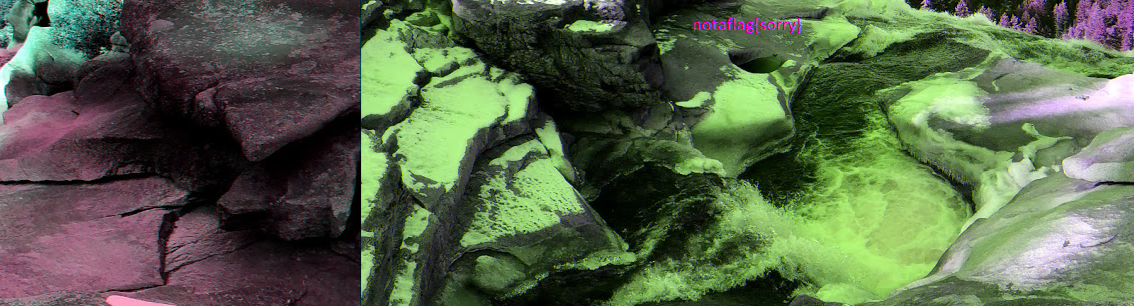

In [15]:
Image(data='temp', format='jpg')

The height looks small. `32 01` to `96 03`

In [18]:
hex(0x0132 * 3) # 96 03

'0x396'

In [16]:
Image(data='temp', format='jpg')